# Prediction Using Supervised Learning
The supervised learning is the learning in which we are given a dataset and we already know what our correct output should look like. In this learning we have a labled dataset. They are categorized as:
- Regression: We are trying to predict results in continuous output
- Classification: It is the process of predicting classof given data points.

In [77]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Loading the dataset

In [78]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Dataset Description:
Hours: The number of hours a student studies<br>
Score: Based on the hours studied the score obtained by the student

### Data Analysis and Visualization

In [79]:
#Analysing the shape of the dataset
data.shape

(25, 2)

The dataset have 25 rows and 2 columns

In [80]:
#Finding is there is any null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the dataset

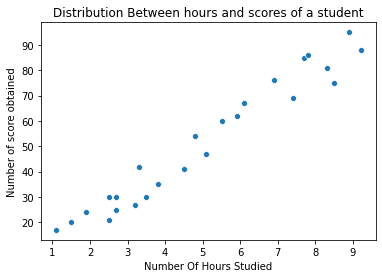

In [81]:
#Visualizing the data
sns.scatterplot(data['Hours'],data['Scores'],)
plt.xlabel('Number Of Hours Studied')
plt.ylabel("Number of score obtained")
plt.title("Distribution Between hours and scores of a student")
plt.show()

We can see that the data is linearly increasing, that is, with increase in number of hours the scors too increase.<br> We can apply the regression model to the dataset for predicting the scores as the target value is linear.

### Building the model

### Linear Regression
It is the most common regression model in supervised learning. Here we have dependent variable 'y' and independent variable 'X'.<br> It is a univariate Linear Regression. It is the simplest case of linear regression with a single independent variable, X=x. <br>**Goal**: Given a training set to learn a function h:X->y, so that h(x) is a good predictor for the corresponding value of y, where h(x) is our hypothesis h maps from x's to y's. Mathematically:<br>**Representing h**: $\theta_{0}+\theta_{1}x$<br>**Parameter**: $\theta_{0},\theta_{1}$, choose the parameters so that $h_{(\theta)}(x)$ is close to y for training set.<br> $minimize_{\theta_{0}.\theta_{1}}\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x)-y)^2$ <br> **Cost Function**:J($\theta_{0},\theta_{1}$) It measures the accuracy of hypothesis.<br> **Goal**:$minimize_{\theta_{0}.\theta_{1}}J(\theta_{0},\theta_{1})$

In [82]:
#Creating the independent and dependent variable X and y.
X=np.array(data['Hours']).reshape(-1,1)
y=np.array(data['Scores'])

The input(X) and output(y) should be arrays or similar objects. reshape() on X because this array is required to be two-dimensional.That’s exactly what the argument (-1, 1) of .reshape() specifies.

In [83]:
#Splitting the dataset into training and test dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [84]:
#Creating the instance for LinearRegression and calling fit() on X_train and y_train
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
#Predicting the accuracy of the model
sc=lr.score(X,y)
print(sc)

0.9517405224069525


The model have 95% accuracy

In [86]:
#Predicting the model on X_test
y_pred=lr.predict(X_test)

In [87]:
#Comparing the actual and predicted value of the test set
df=pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
print (df)

   Actual  Predicted
0      76  68.878158
1      85  76.486907
2      41  46.051910
3      30  28.932224
4      47  51.758472
5      62  59.367221
6      60  55.562847


In [90]:
#Calculating the mean Square Error
from sklearn.metrics import mean_squared_error
err=mean_squared_error(y_test,y_pred)
r_err=np.sqrt(err)
print(r_err)

5.333428684942788


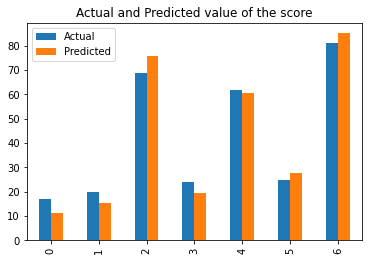

In [71]:
df.plot(kind='bar')
plt.title('Actual and Predicted value of the score')
plt.show()

### What will be the predicted score if the student studies for 9.25hrs/day?

In [72]:
hour=np.array([9.25]).reshape((-1,1))
y_pred=lr.predict(hour)
print("The predicted score for studying 9.25hrs/day is: ",y_pred)

The predicted score for studying 9.25hrs/day is:  [94.90902949]


### Conclusion

We have the accuracy of 95.04% and root mean square error of 5.33